In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

### Importing an extension of the "missing" functions from Pandas

In [2]:
%run utils/u.0.0-pandas_missing_extension.ipynb

### Importing functions of the DataFrame Dictionary

In [3]:
%run utils/u.0.1-df_functions.ipynb

### Getting the interim data

In [4]:
arg_di_df = pd.read_csv("../data/interim/WDICSV_INTERIM.csv")
print(arg_di_df.shape)
arg_di_df.info()

(64, 97)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 97 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      64 non-null     int64  
 1   EG.ELC.ACCS.ZS            33 non-null     float64
 2   FX.OWN.TOTL.ZS            4 non-null      float64
 3   FX.OWN.TOTL.OL.ZS         4 non-null      float64
 4   FX.OWN.TOTL.40.ZS         4 non-null      float64
 5   FX.OWN.TOTL.PL.ZS         4 non-null      float64
 6   FX.OWN.TOTL.60.ZS         4 non-null      float64
 7   FX.OWN.TOTL.SO.ZS         4 non-null      float64
 8   FX.OWN.TOTL.YG.ZS         4 non-null      float64
 9   per_si_allsi.adq_pop_tot  12 non-null     float64
 10  per_allsp.adq_pop_tot     12 non-null     float64
 11  per_sa_allsa.adq_pop_tot  12 non-null     float64
 12  per_lm_alllm.adq_pop_tot  10 non-null     float64
 13  SE.PRM.TENR               26 non-null     float64
 14  SL.

### Setting initial plots styles

In [5]:
sns.set_style(
    style="whitegrid",
    rc={
        "figure.figsize": (10,10)
    }
)

### First missing variables summaries

In [6]:
arg_di_df.missing.missing_variable_summary().sort_values("pct_missing", ascending=False)

,variable,n_missing,n_cases,pct_missing
38,SE.TER.CUAT.MS.ZS,64,64,100.0
14,SL.TLF.0714.SW.TM,64,64,100.0
39,SE.TER.CUAT.DO.ZS,64,64,100.0
34,SE.SEC.CUAT.PO.ZS,64,64,100.0
32,SE.TER.CUAT.BA.ZS,64,64,100.0
...,...,...,...,...
70,SP.POP.1564.TO.ZS,0,64,0.0
69,SP.POP.0014.TO.ZS,0,64,0.0
46,NY.GDP.MKTP.KD,0,64,0.0
45,IT.MLT.MAIN,0,64,0.0


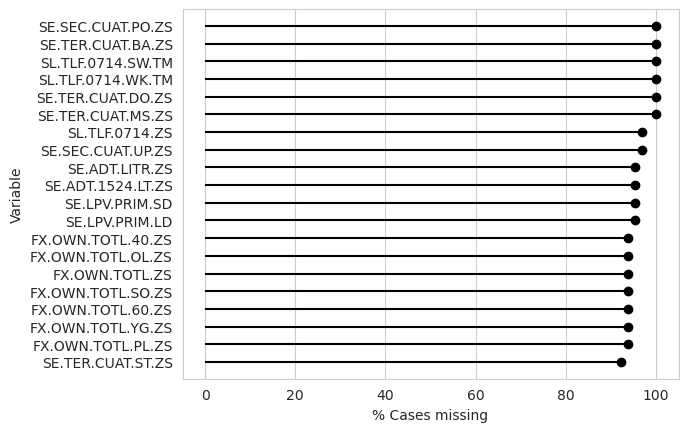

In [7]:
arg_di_df.missing.missing_variable_plot(20)

### Adding one column for years of military dictatorship

In [8]:
years_of_military_dictatorship = [
    (1930,1932),
    (1943,1946),
    (1955,1958),
    (1962,1963),
    (1966,1973),
    (1976,1983)
]

arg_di_df["year.of.dictatorship"] = arg_di_df["Year"].apply(lambda year: any(start <= year <= end for start, end in years_of_military_dictatorship))

In [9]:
dictionary = pd.read_csv("../data/utils/DF_DICTIONARY.csv")
if dictionary.loc[dictionary["Indicator Code"] == "year.of.dictatorship"].empty:
    dictionary = pd.concat(
        [
            dictionary,
            pd.DataFrame({
                "Indicator Name": ["It was a year of military dictatorship"],
                "Indicator Code": ["year.of.dictatorship"],
                "Indicator Code Snake Case": ["year_of_dictatorship"]
            })
        ]
    )
    dictionary.to_csv("../data/utils/DF_DICTIONARY.csv", index=False)

In [10]:
def plot_count_of_years_of_military_dictatorship(df):
    indicator_name = dictionary.loc[dictionary["Indicator Code"] == "year.of.dictatorship",["Indicator Name"]].iloc[0,0]
    years_of_dictatorship = pd.DataFrame(df.rename(columns={"year.of.dictatorship": indicator_name}).value_counts(indicator_name,ascending=True))
    years_of_dictatorship = years_of_dictatorship.rename(columns={"count": "Count"}).T
    years_of_dictatorship.plot(kind="barh",stacked=True, color=["green","grey"])

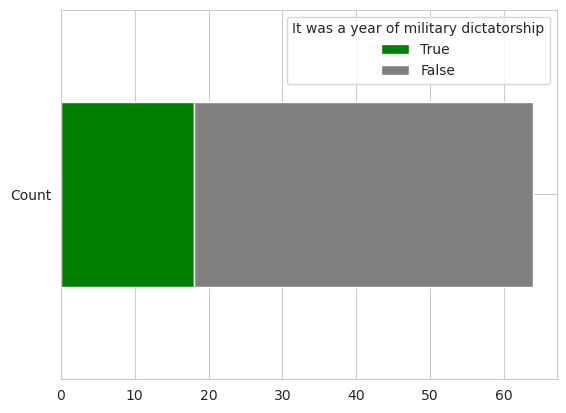

In [11]:
plot_count_of_years_of_military_dictatorship(arg_di_df)

### Exploring missing data of years of military dictatorship

In [12]:
arg_dictorship_years_df = arg_di_df[arg_di_df['year.of.dictatorship']]
arg_dictorship_years_df

,Year,EG.ELC.ACCS.ZS,FX.OWN.TOTL.ZS,FX.OWN.TOTL.OL.ZS,FX.OWN.TOTL.40.ZS,FX.OWN.TOTL.PL.ZS,FX.OWN.TOTL.60.ZS,FX.OWN.TOTL.SO.ZS,FX.OWN.TOTL.YG.ZS,per_si_allsi.adq_pop_tot,...,SE.TER.ENRR,SE.SEC.DURS,SL.EMP.SELF.ZS,SL.UEM.NEET.ME.ZS,SL.UEM.ADVN.ZS,SL.UEM.BASC.ZS,SL.UEM.INTM.ZS,SL.UEM.TOTL.ZS,SP.URB.TOTL.IN.ZS,year.of.dictatorship
2,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.767,True
3,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.309,True
6,1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.888,True
7,1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.398,True
8,1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.901,True
9,1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.394,True
10,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.377590,5.0,NaN,NaN,NaN,NaN,NaN,NaN,78.880,True
11,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.440980,5.0,NaN,NaN,NaN,NaN,NaN,NaN,79.321,True
12,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.620810,5.0,NaN,NaN,NaN,NaN,NaN,NaN,79.743,True
13,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.751631,5.0,NaN,NaN,NaN,NaN,NaN,NaN,80.158,True


### Filtering rows and columns with a lot of missing values

Comparing the DataFrame resulting of changing the order of the filters (rows and columns)

In [13]:
print(filter_by_cols_first(arg_di_df, 0.7).shape) # I obtain diffrent shapes when I change the percentage of missing values
print(filter_by_rows_first(arg_di_df, 0.7).shape)

(54, 25)
(8, 71)


I'll work with the first option due to it has more rows and less columns

In [14]:
arg_di_df_best_cases = filter_by_cols_first(arg_di_df, 0.7)
arg_di_df_best_cases

,Year,IT.MLT.MAIN,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD,NY.GDP.PCAP.KD.ZG,SP.DYN.LE00.IN,IT.CEL.SETS,SH.DTH.IMRT,SH.DTH.MORT,...,SM.POP.REFG,SM.POP.REFG.OR,SP.RUR.TOTL.ZS,SE.PRE.ENRR,SE.PRM.ENRR,SE.SEC.ENRR,SE.TER.ENRR,SE.SEC.DURS,SP.URB.TOTL.IN.ZS,year.of.dictatorship
10,1970,1287000.0,2.207342e+11,3.045643,9257.895572,1.443200,65.589,0.0,32198.0,NaN,...,35000.0,NaN,21.120,23.444870,105.769478,44.709621,13.377590,5.0,78.880,True
11,1971,1287000.0,2.332236e+11,5.658131,9628.037838,3.998125,65.541,NaN,32685.0,NaN,...,34000.0,NaN,20.679,24.937660,106.752098,45.642109,15.440980,5.0,79.321,True
12,1972,1287000.0,2.370215e+11,1.628417,9630.010366,0.020487,65.923,NaN,33079.0,NaN,...,33000.0,NaN,20.257,26.519970,106.286819,47.472710,16.620810,5.0,79.743,True
13,1973,1287000.0,2.436859e+11,2.811754,9739.416271,1.136093,66.323,NaN,33442.0,NaN,...,37000.0,NaN,19.842,29.065580,105.710747,49.939709,19.751631,5.0,80.158,True
14,1974,1287000.0,2.571710e+11,5.533804,10105.049508,3.754160,66.563,NaN,33629.0,40082.0,...,47000.0,NaN,19.433,31.402250,106.127319,52.762390,22.883011,5.0,80.567,False
15,1975,1651000.0,2.570980e+11,-0.028412,9935.938635,-1.673528,67.081,0.0,33434.0,39640.0,...,46000.0,NaN,19.031,35.701939,105.472260,54.387550,27.077160,5.0,80.969,False
16,1976,1678000.0,2.519091e+11,-2.018252,9581.841403,-3.563803,67.228,0.0,32686.0,38536.0,...,41010.0,NaN,18.634,37.910751,105.146507,55.880482,27.011740,5.0,81.366,True
17,1977,1692000.0,2.693768e+11,6.934148,10083.815183,5.238803,67.861,0.0,31346.0,36750.0,...,35000.0,NaN,18.245,39.397282,105.946831,55.626678,23.964741,5.0,81.755,True
18,1978,1728000.0,2.572384e+11,-4.506125,9476.063436,-6.027002,68.197,0.0,29499.0,34382.0,...,26390.0,NaN,17.861,NaN,105.351021,55.343731,21.250999,5.0,82.139,True
19,1979,1797000.0,2.835352e+11,10.222763,10278.924624,8.472518,68.491,0.0,27357.0,31734.0,...,27050.0,NaN,17.484,39.189339,105.662491,54.966290,22.120470,5.0,82.516,True


#### Working with best rows

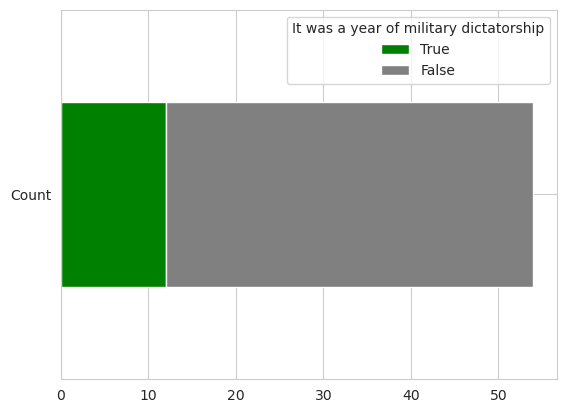

In [15]:
plot_count_of_years_of_military_dictatorship(filter_by_cols_first(arg_di_df, 0.5))

### Exploring missing variables

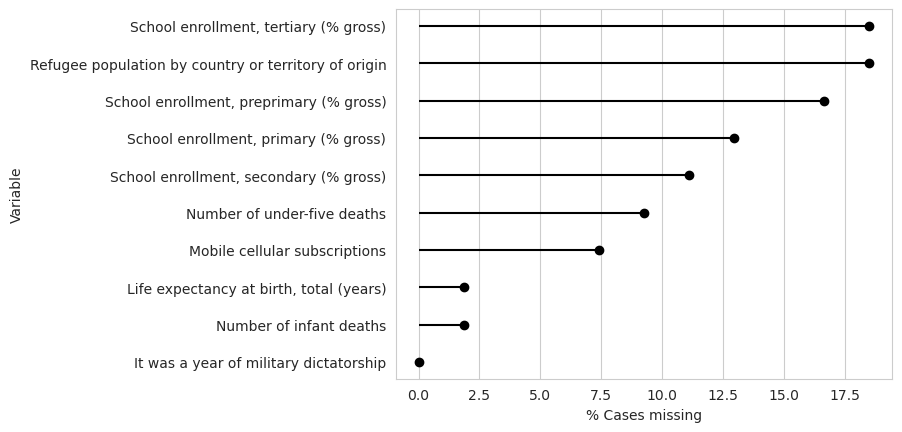

In [16]:
arg_di_df_best_cases.rename(columns=dictionary.set_index("Indicator Code")["Indicator Name"].to_dict(),inplace=False).missing.missing_variable_plot(10)

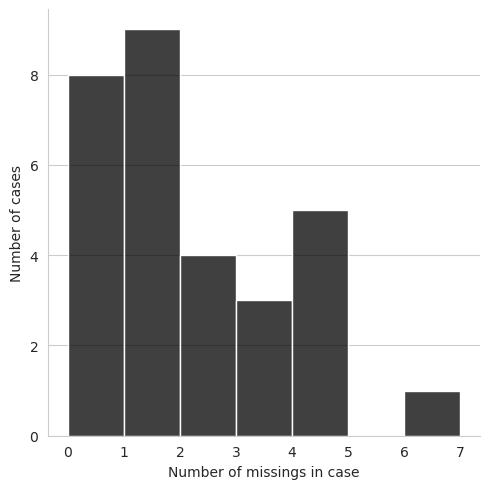

In [17]:
arg_di_df_best_cases.missing.missing_case_plot(30)

In [77]:
# columns_with_missing_values = columns_with_pct_missing(arg_di_df_best_cases, 0.1, True)
# columns_with_missing_values = arg_di_df_best_cases.columns[arg_di_df_best_cases.isnull().any()].to_list()

columns_with_missing_values = arg_di_df_best_cases.isna().sum().sort_values(ascending=False)
columns_with_missing_values = columns_with_missing_values[columns_with_missing_values > 0].index.to_list()
columns_with_missing_values

['SE.TER.ENRR',
 'SM.POP.REFG.OR',
 'SE.PRE.ENRR',
 'SE.PRM.ENRR',
 'SE.SEC.ENRR',
 'SH.DTH.MORT',
 'IT.CEL.SETS',
 'SP.DYN.LE00.IN',
 'SH.DTH.IMRT']

In [59]:
print([get_indicator_name(item) for item in columns_with_missing_values])

['Life expectancy at birth, total (years)', 'Mobile cellular subscriptions', 'Number of infant deaths', 'Number of under-five deaths', 'Refugee population by country or territory of origin', 'School enrollment, preprimary (% gross)', 'School enrollment, primary (% gross)', 'School enrollment, secondary (% gross)', 'School enrollment, tertiary (% gross)']


##### Missing variable runs

I can't see coincidences between the missing variables with this method

In [78]:
all_missing_variable_run = pd.DataFrame()

for i in columns_with_missing_values:

    missing_variable_run = (
        arg_di_df_best_cases
            .missing
            .missing_variable_run(
                variable=i
            )
    )
    all_runs = missing_variable_run.apply(lambda row: row['run_length'] * -1 if row['is_na'] == "missing" else row['run_length'], axis=1).to_list()
    
    all_missing_variable_run = pd.concat(
        [
            all_missing_variable_run,
            pd.DataFrame({
                'variable': [i],
                'all_runs': [all_runs]
            })
        ],
        ignore_index=True
    )

all_missing_variable_run
    

,variable,all_runs
0,SE.TER.ENRR,"[18, -3, 1, -2, 1, -3, 24, -2]"
1,SM.POP.REFG.OR,"[-10, 44]"
2,SE.PRE.ENRR,"[8, -1, 10, -2, 1, -2, 1, -1, 25, -3]"
3,SE.PRM.ENRR,"[13, -1, 5, -1, 2, -2, 1, -1, 26, -2]"
4,SE.SEC.ENRR,"[19, -1, 2, -2, 1, -1, 26, -2]"
5,SH.DTH.MORT,"[-4, 49, -1]"
6,IT.CEL.SETS,"[1, -4, 49]"
7,SP.DYN.LE00.IN,"[53, -1]"
8,SH.DTH.IMRT,"[53, -1]"


To see more clearly, I plot the missing values

{'SE.TER.ENRR': 'School enrollment, tertiary (% gross)', 'SM.POP.REFG.OR': 'Refugee population by country or territory of origin', 'SE.PRE.ENRR': 'School enrollment, preprimary (% gross)', 'SE.PRM.ENRR': 'School enrollment, primary (% gross)', 'SE.SEC.ENRR': 'School enrollment, secondary (% gross)', 'SH.DTH.MORT': 'Number of under-five deaths', 'IT.CEL.SETS': 'Mobile cellular subscriptions', 'SP.DYN.LE00.IN': 'Life expectancy at birth, total (years)', 'SH.DTH.IMRT': 'Number of infant deaths'}


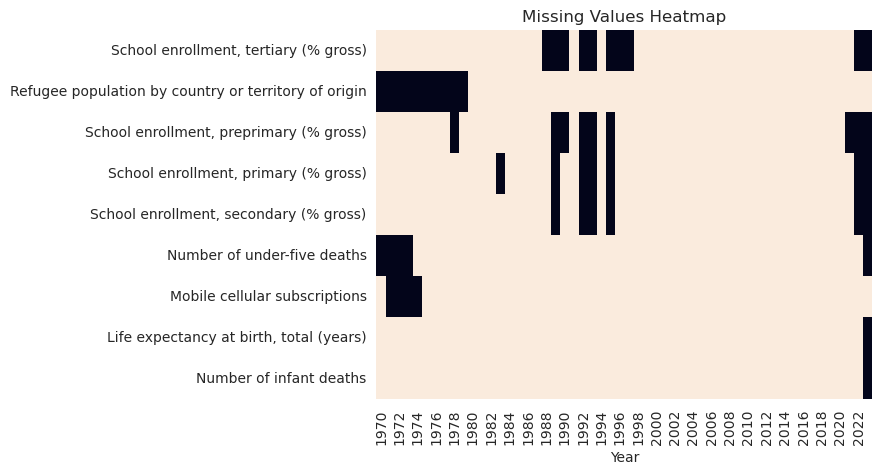

In [79]:
columns_with_names = [{item: get_indicator_name(item) for item in columns_with_missing_values}][0]
print(columns_with_names)
data = arg_di_df_best_cases[columns_with_missing_values + ['Year']].rename(columns=columns_with_names).missing.sort_variables_by_missingness().sort_values(by="Year").set_index('Year')
sns.heatmap(~data.isnull().T,cbar=False,xticklabels="auto")
plt.title("Missing Values Heatmap")
plt.show()

/home/ubuntu/anaconda3/envs/research-on-argentina/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/ubuntu/anaconda3/envs/research-on-argentina/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

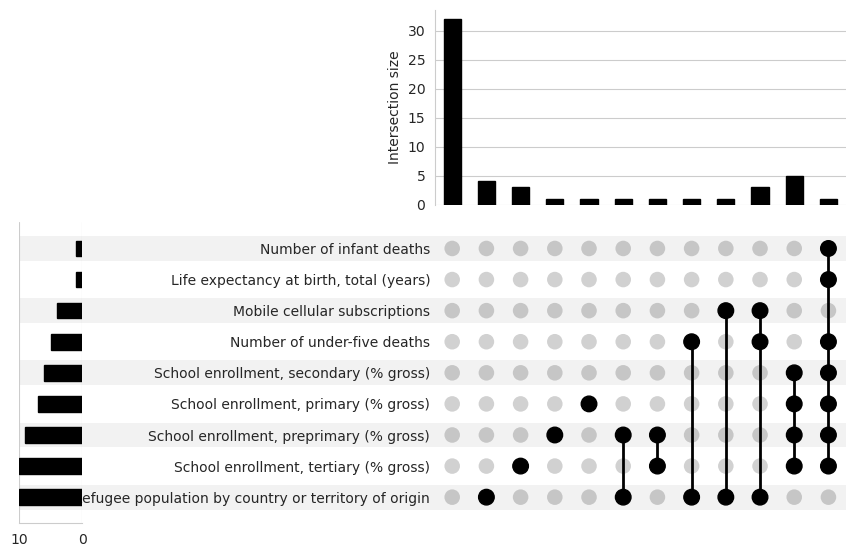

In [ ]:
data.missing.missing_upsetplot()

#TODO: Understand what this plot is showing

##### Shadow matrix

In [53]:
shadow_matrix = arg_di_df_best_cases.missing.bind_shadow_matrix(only_missing = True, true_string="Missing", false_string="Not Missing")
shadow_matrix

,Year,IT.MLT.MAIN,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD,NY.GDP.PCAP.KD.ZG,SP.DYN.LE00.IN,IT.CEL.SETS,SH.DTH.IMRT,SH.DTH.MORT,...,year.of.dictatorship,SP.DYN.LE00.IN_NA,IT.CEL.SETS_NA,SH.DTH.IMRT_NA,SH.DTH.MORT_NA,SM.POP.REFG.OR_NA,SE.PRE.ENRR_NA,SE.PRM.ENRR_NA,SE.SEC.ENRR_NA,SE.TER.ENRR_NA
10,1970,1287000.0,2.207342e+11,3.045643,9257.895572,1.443200,65.589,0.0,32198.0,NaN,...,True,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
11,1971,1287000.0,2.332236e+11,5.658131,9628.037838,3.998125,65.541,NaN,32685.0,NaN,...,True,Not Missing,Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
12,1972,1287000.0,2.370215e+11,1.628417,9630.010366,0.020487,65.923,NaN,33079.0,NaN,...,True,Not Missing,Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
13,1973,1287000.0,2.436859e+11,2.811754,9739.416271,1.136093,66.323,NaN,33442.0,NaN,...,True,Not Missing,Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
14,1974,1287000.0,2.571710e+11,5.533804,10105.049508,3.754160,66.563,NaN,33629.0,40082.0,...,False,Not Missing,Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
15,1975,1651000.0,2.570980e+11,-0.028412,9935.938635,-1.673528,67.081,0.0,33434.0,39640.0,...,False,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
16,1976,1678000.0,2.519091e+11,-2.018252,9581.841403,-3.563803,67.228,0.0,32686.0,38536.0,...,True,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
17,1977,1692000.0,2.693768e+11,6.934148,10083.815183,5.238803,67.861,0.0,31346.0,36750.0,...,True,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
18,1978,1728000.0,2.572384e+11,-4.506125,9476.063436,-6.027002,68.197,0.0,29499.0,34382.0,...,True,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing
19,1979,1797000.0,2.835352e+11,10.222763,10278.924624,8.472518,68.491,0.0,27357.0,31734.0,...,True,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing


In [96]:
shadow_matrix.groupby("SE.PRE.ENRR_NA").sum()

,Year,IT.MLT.MAIN,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD,NY.GDP.PCAP.KD.ZG,SP.DYN.LE00.IN,IT.CEL.SETS,SH.DTH.IMRT,SH.DTH.MORT,...,SP.URB.TOTL.IN.ZS,year.of.dictatorship,SP.DYN.LE00.IN_NA,IT.CEL.SETS_NA,SH.DTH.IMRT_NA,SH.DTH.MORT_NA,SM.POP.REFG.OR_NA,SE.PRM.ENRR_NA,SE.SEC.ENRR_NA,SE.TER.ENRR_NA
SE.PRE.ENRR_NA,,,,,,,,,,,,,,,,,,,,,
Missing,18003,42831298.0,3.553332e+12,13.292651,93358.558101,1.875187,580.988,182078285.0,126722.0,144012.0,...,796.233,1,Not MissingNot MissingNot MissingNot MissingNo...,Not MissingNot MissingNot MissingNot MissingNo...,Not MissingNot MissingNot MissingNot MissingNo...,Not MissingNot MissingNot MissingNot MissingNo...,MissingNot MissingNot MissingNot MissingNot Mi...,Not MissingMissingNot MissingMissingMissingMis...,Not MissingMissingNot MissingMissingMissingMis...,Not MissingMissingMissingMissingMissingMissing...
Not Missing,89808,264249211.0,1.770004e+13,96.717914,495061.698321,38.583042,3256.253,911601987.0,754422.0,711487.0,...,3922.319,11,Not MissingNot MissingNot MissingNot MissingNo...,Not MissingMissingMissingMissingMissingNot Mis...,Not MissingNot MissingNot MissingNot MissingNo...,MissingMissingMissingMissingNot MissingNot Mis...,MissingMissingMissingMissingMissingMissingMiss...,Not MissingNot MissingNot MissingNot MissingNo...,Not MissingNot MissingNot MissingNot MissingNo...,Not MissingNot MissingNot MissingNot MissingNo...


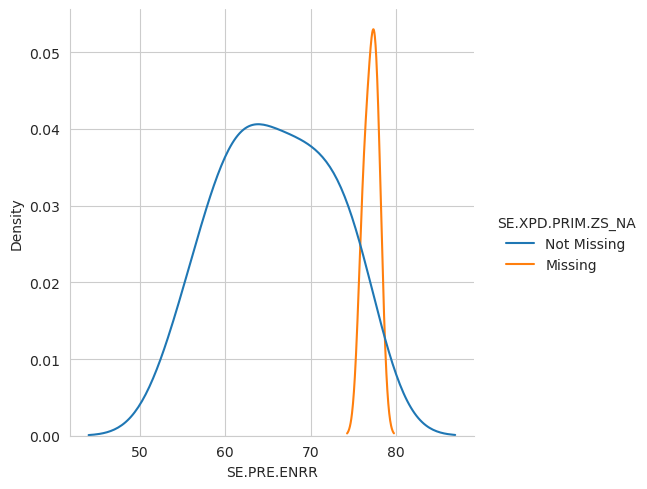

In [40]:
sns.displot(data=shadow_matrix,x="SE.PRE.ENRR",hue="SE.XPD.PRIM.ZS_NA",kind="kde")

<Axes: xlabel='SE.XPD.PRIM.ZS_NA', ylabel='SE.PRE.ENRR'>

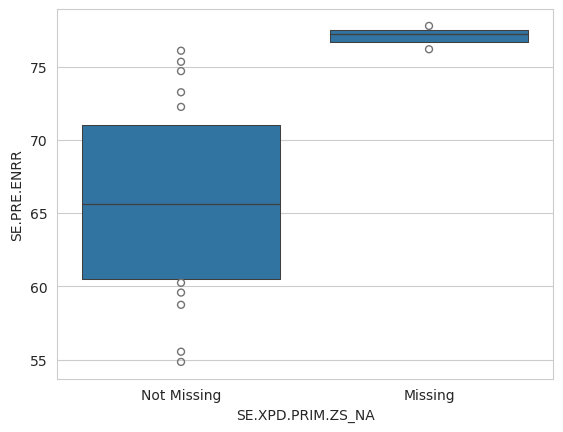

In [33]:
sns.boxenplot(data=shadow_matrix,y="SE.PRE.ENRR",x="SE.XPD.PRIM.ZS_NA")

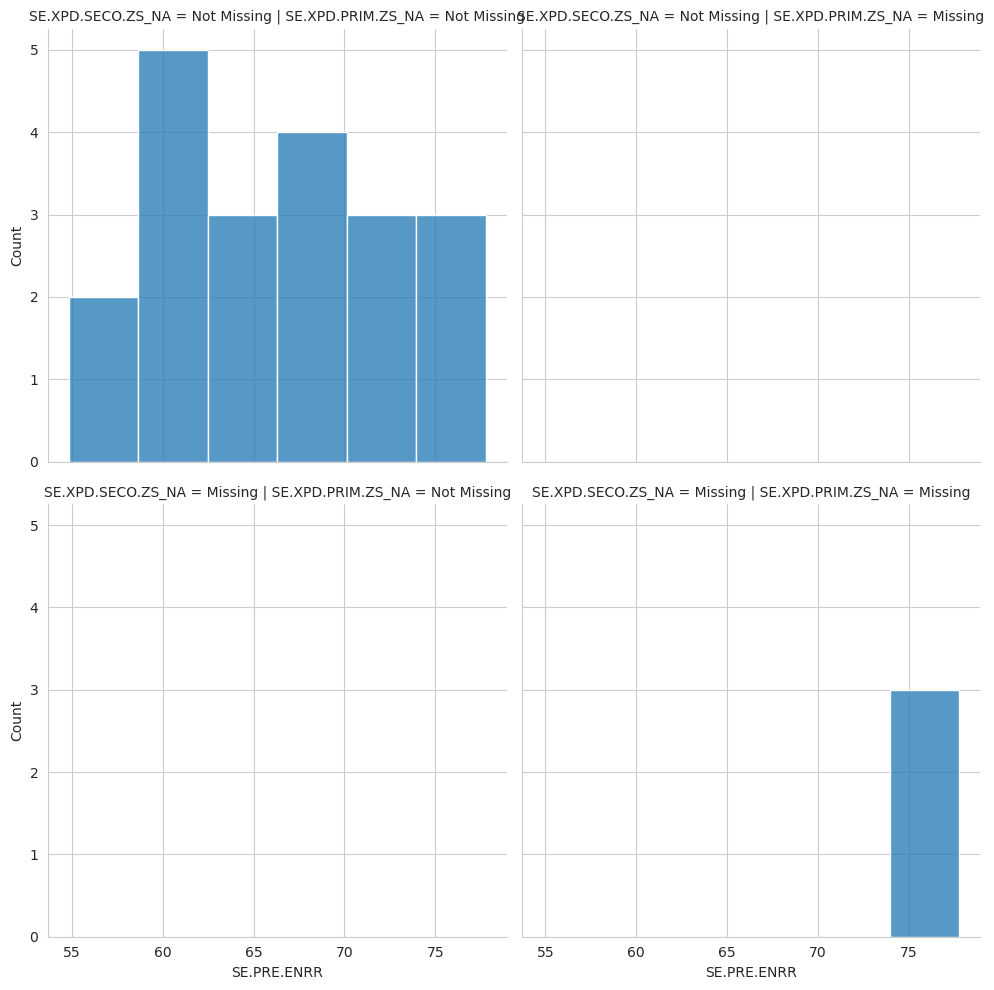

In [ ]:
sns.displot(data=shadow_matrix,x="SE.PRE.ENRR",col="SE.XPD.PRIM.ZS_NA",row="SE.XPD.SECO.ZS_NA",facet_kws={"sharey":True})

<Axes: xlabel='SE.PRE.ENRR', ylabel='SE.XPD.PRIM.ZS'>

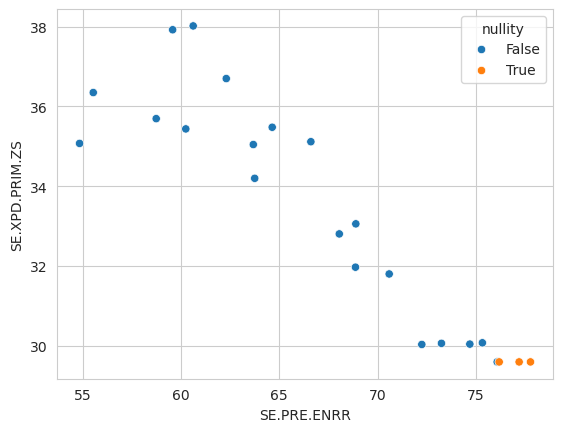

In [45]:
shadow_matrix_with_na_filled = shadow_matrix.apply(
    axis="rows",
    func= lambda column: column.fillna(column.min()) if column.name in ["SE.XPD.SECO.ZS", "SE.XPD.PRIM.ZS"] else column 
).assign(
        nullity=lambda df: df["SE.XPD.SECO.ZS_NA"] | df["SE.XPD.PRIM.ZS_NA"]
    )

sns.scatterplot(data=shadow_matrix_with_na_filled, x="SE.PRE.ENRR", y="SE.XPD.PRIM.ZS", hue="nullity")

#### Correlation between missing variables

<Axes: >

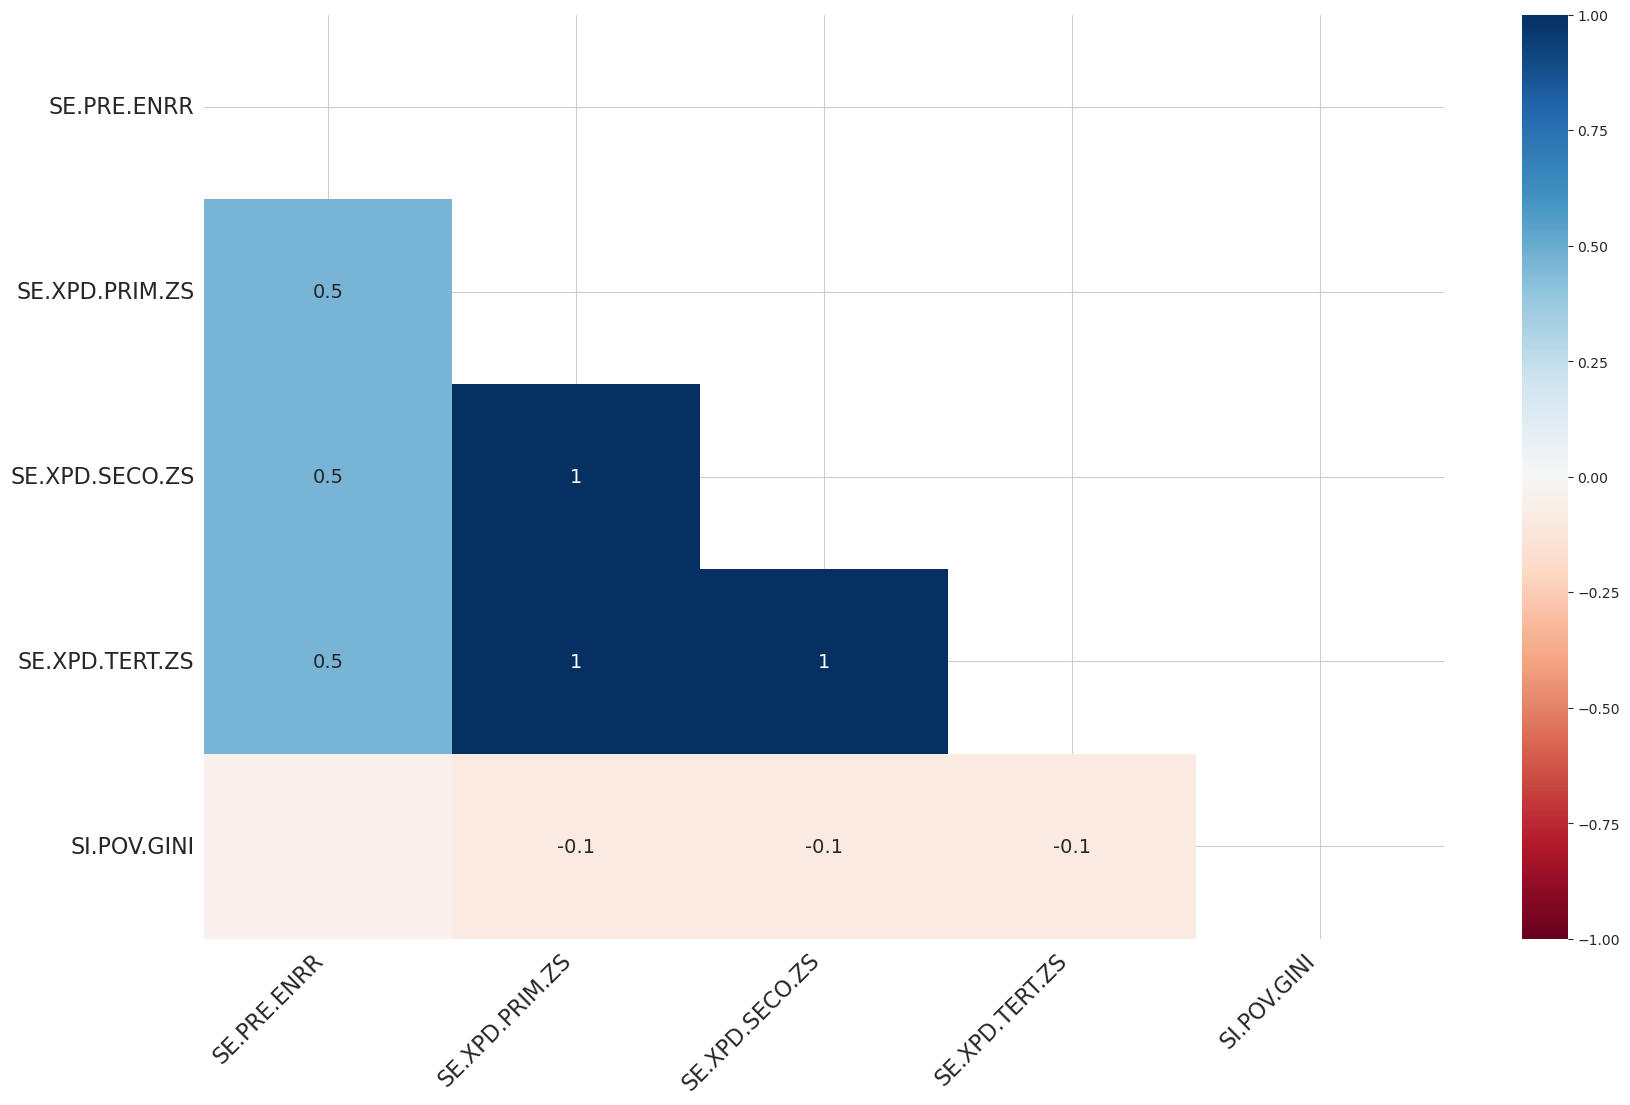

In [ ]:
missingno.heatmap(df=arg_di_df_best_cases_2)

<Axes: >

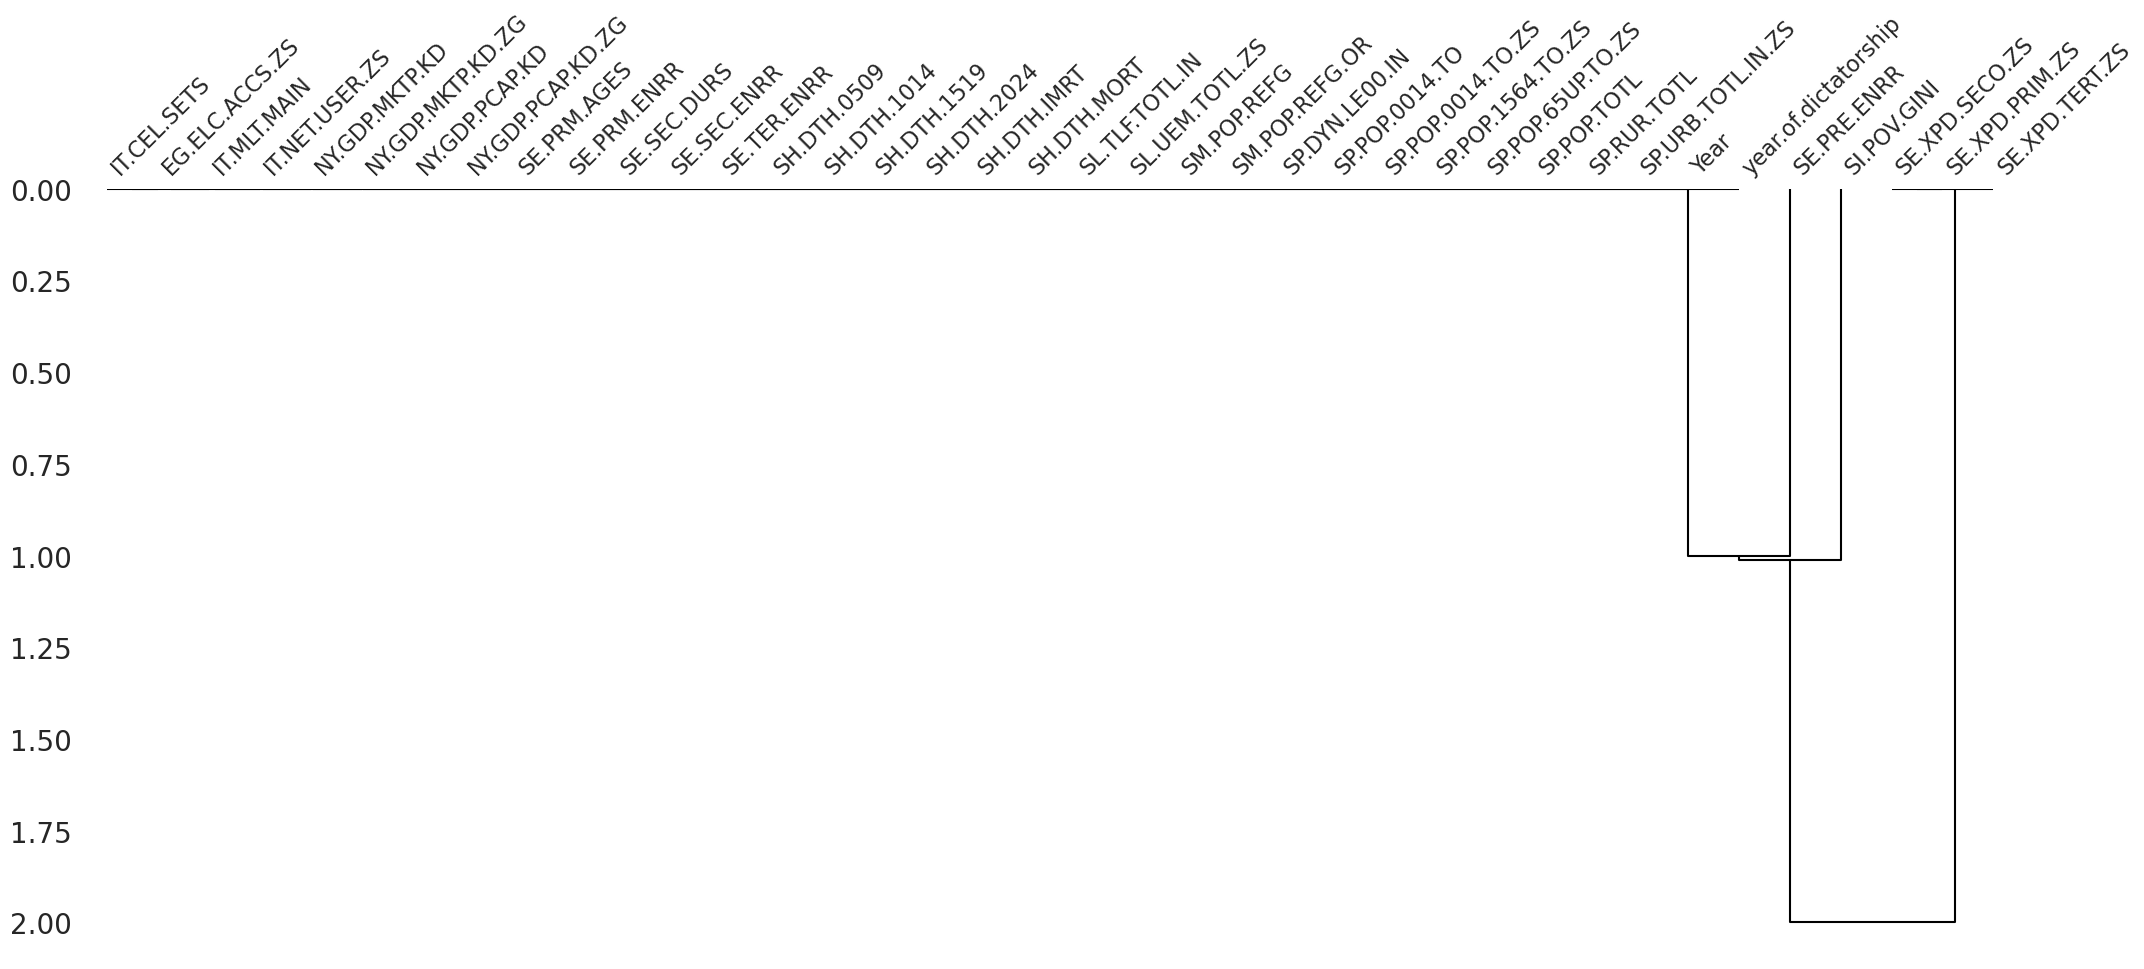

In [ ]:
# Grouped by hierachical clusters with high correlation. Correlation is higher when the branchs are closer. 
missingno.dendrogram(df=arg_di_df_best_cases_2)

#### Imputation of a single value

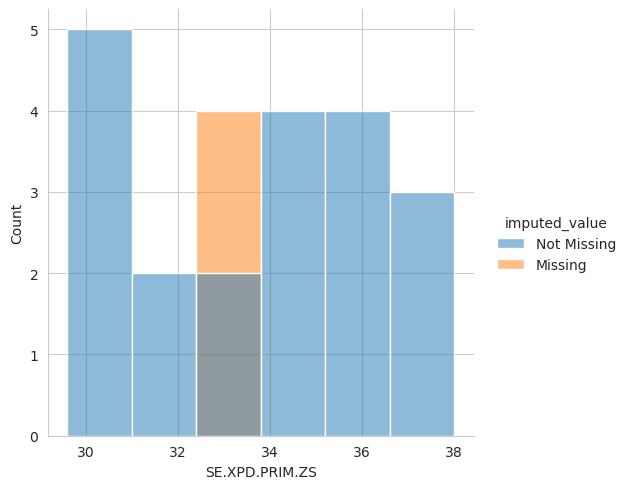

In [39]:
(
    shadow_matrix
        [["SE.XPD.PRIM.ZS", "SE.XPD.PRIM.ZS_NA"]]
        .apply(
            axis="rows",
            func=lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
        )
        .assign(imputed_value=lambda df: df["SE.XPD.PRIM.ZS_NA"])
        .pipe(
            lambda df: (
                sns.displot(
                    data=df,
                    x="SE.XPD.PRIM.ZS",
                    hue="imputed_value"
                )
            )
        )
)

#### Using dropna function

In [24]:
print(arg_di_df_best_cases_2.shape)
arg_di_df_best_cases_2.dropna(
    subset= columns_with_missing_values,
    how= "any"
).shape

(23, 38)


(18, 38)

In [40]:
output_indicators_file = arg_di_df_best_cases.to_csv('../data/processed/WDICSV_PROCESSED.csv', index_label='Year')